#  로지스틱 회귀
- 로지스틱 회귀 개념
- 합격 불합격 확률
- BreastCancer.csv
- 엔트로피
- 소프트맥스

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 공부한 시간: X1

In [85]:
# 합격한 사람 공부시간 18개 / 불합격한 사람 공부시간 16개
pass_time = [8.5,8.7, 9, 9.5, 10, 12, 14, 14.5, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,6.2,7.4]

p, f = len(pass_time), len(fail_time)
p, f

(18, 16)

In [86]:
X1= np.concatenate((pass_time,fail_time));X
print(X1)
print(X1.shape)

[ 8.5  8.7  9.   9.5 10.  12.  14.  14.5 16.  16.  16.5 17.  17.  17.
 17.5 20.  20.  20.   1.   2.   2.1  2.6  2.7  2.8  2.9  3.   3.2  3.4
  3.5  3.6  3.   5.   6.2  7.4]
(34,)


## 합격/불합격: y

In [87]:
y1=[1]*len(pass_time)
y0=[0]*len(fail_time)
y = np.concatenate((y1,y0))
print(y)
print(y.shape)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(34,)


##  게임한 시간: X2
- 합격자, 불합격자 수는 동일 해야 함

In [88]:
pass_time_game = [3, 4, 1.5, 2, 2.1,2.6,2.1,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4, 1.3, 1.2]
fail_time_game = [10, 9, 16, 17, 16, 17,10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 18.1]
len(pass_time_game), len(fail_time_game)

(20, 18)

In [89]:
X2= np.concatenate((pass_time_game,fail_time_game));
print(X2)
print(X2.shape)

[ 3.   4.   1.5  2.   2.1  2.6  2.1  2.8  2.9  3.   3.2  3.4  3.5  3.6
  3.   5.   5.2  5.4  1.3  1.2 10.   9.  16.  17.  16.  17.  10.  12.
 14.  14.5 15.  16.  16.  16.5 17.  17.  17.  18.1]
(38,)


## 공부시간, 게임시간 취합

In [90]:
X = pd.DataFrame(list(zip(X1, X2)))
X.shape

(34, 2)

In [91]:
print(X.shape)
print(y.shape)

(34, 2)
(34,)


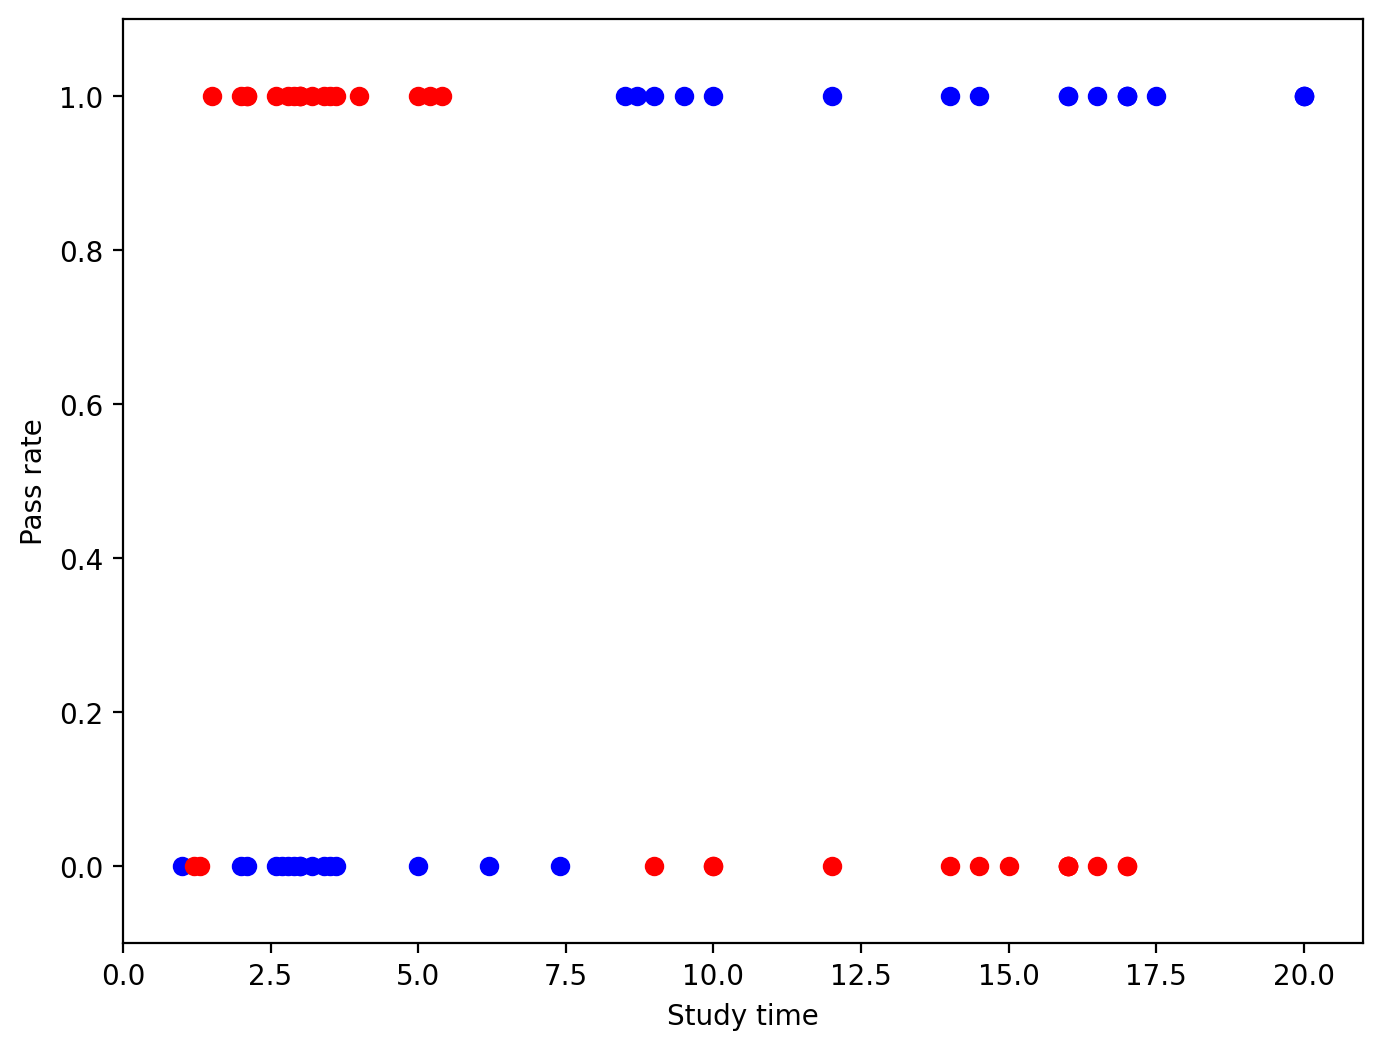

In [92]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")

plt.scatter(X[0], y, c='b')     # 공부한 시간 : 짧은 사람은 불합격(0), 긴 사람은 합격(1)
plt.scatter(X[1], y, c='r')     # 게임한 시간 : 짧은 사람은 합격(0), 긴 사람은 불합격(1)
plt.show()

In [93]:
model = LogisticRegression() # (1) 생성
model.fit(X,y) # (2) 학습 34개 모두 사용 (컬럼이 2개))

print(model.coef_)
print(model.intercept_)

print("공부시간(X1)의 회귀계수 : ", model.coef_[0][0])
print("게임시간(X2)의 회귀계수 : ", model.coef_[0][1])

[[ 0.94720148 -0.41972513]]
[-3.89440327]
공부시간(X1)의 회귀계수 :  0.9472014763134726
게임시간(X2)의 회귀계수 :  -0.4197251297171523


In [94]:
model.predict_proba([[1.2,5.5],[8.8,1.9],[20,30]])  # (공부한 시간, 게임한 시간) 입력하면 (합격 확률, 불합격 확률))
#model.predict([[1.2,5.5],[8.8,1.9],[20,30]])    # (공부한 시간, 게임한 시간) 입력하면 합불 여부 반환

array([[0.99373349, 0.00626651],
       [0.02549389, 0.97450611],
       [0.07886476, 0.92113524]])

## 결정 경계

**식 4-16: 하나의 훈련 샘플에 대한 비용 함수**

$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$


**식 4-17: 로지스틱 회귀 비용 함수(로그 손실)**

$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$


**식 4-18: 로지스틱 비용 함수의 편도 함수**

$
\dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)}
$

## 시그모이드
- 이진 분류에서 자주 사용되는 모델이며 이를 로지스틱 회귀모델이라고 한다
- 로지스틱 회귀에서는 회귀식에서 반환된 값을 0~1 범위의 확률값으로 변환해줍니다.
- 회귀계수를 학습할 때도, 0~1 확률값이 0/1의 정답에 가깝도록 학습됩니다.
- LogisticRegression을 통해 구해진 회귀계수로 y값을 구한 후 직접 시그모이드 함수에 적용하여 플로팅 해본다.

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.11.56.png?raw=1" align='left'  width=400>




In [95]:
def logreg(z):
    return 1 /(1+np.exp(-z))

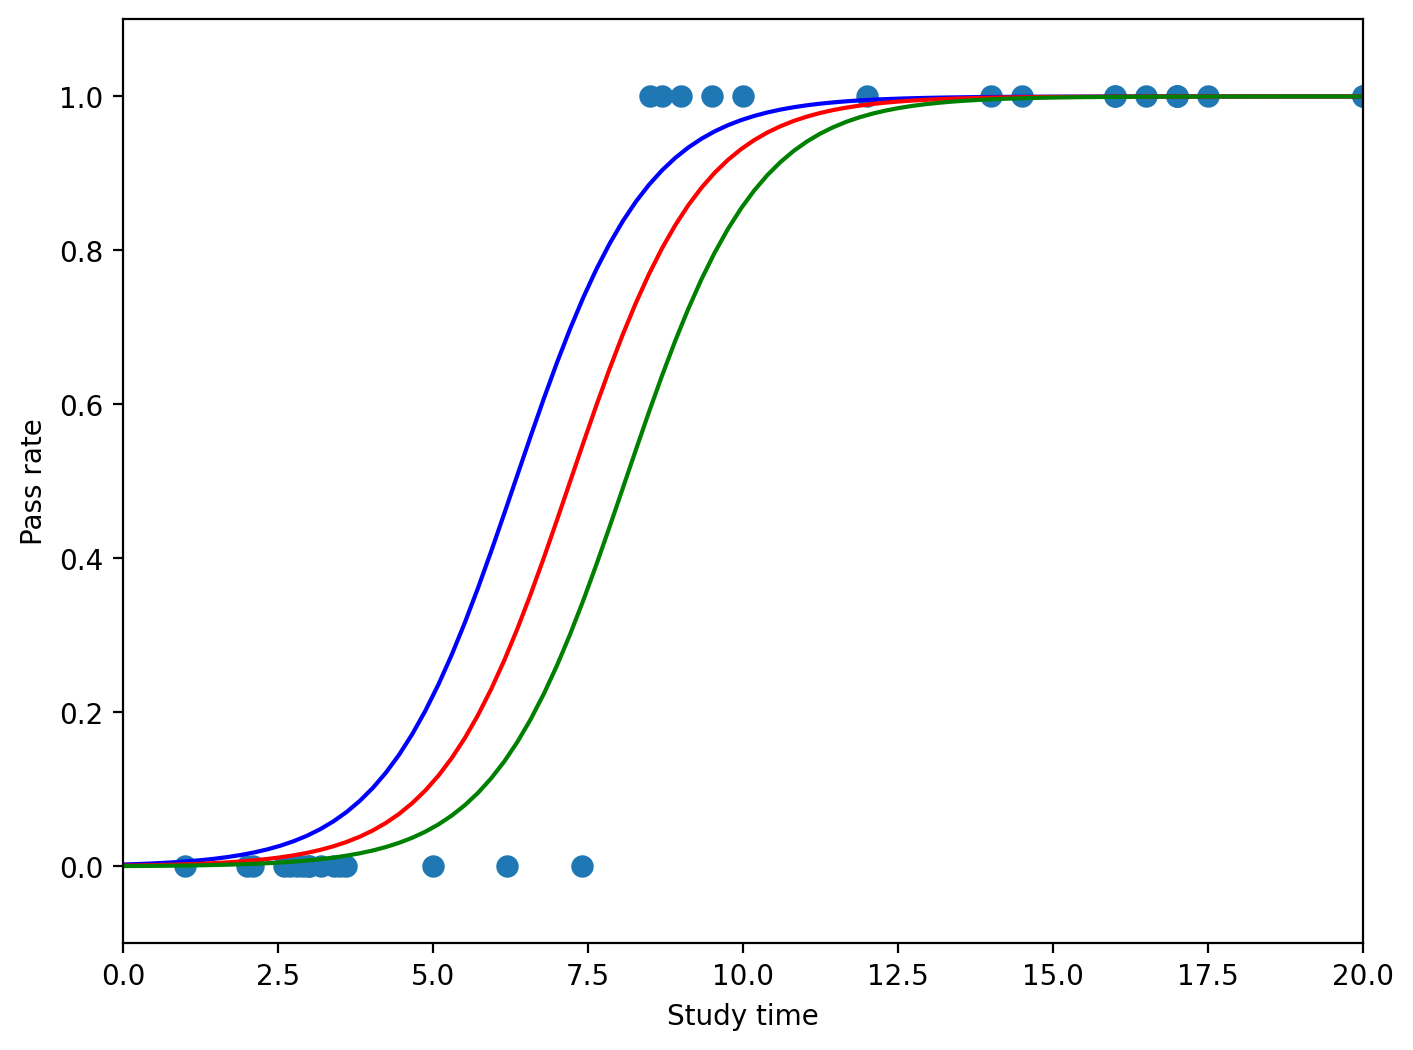

In [96]:
a1, a2, b = model.coef_[0][0], model.coef_[0][1], model.intercept_[0]
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X[0], y, s=50)
xs = np.linspace(0,21, 100)

# 회귀식의 절편값이 변할 때 그래프의 움직임을 살펴본다.
# 공부한 시간에 따른 합격률이므로 기울기는 양수

ys = logreg(a1*xs +a2*5+ b) # 게임한 시간을 5시간으로 고정하고 공부한 시간에 따른 합격 여부
plt.plot(xs, ys, c='b')     
ys = logreg(a1*xs +a2*7+ b) # 게임한 시간을 7시간으로 고정하고 공부한 시간에 따른 합격 여부
plt.plot(xs, ys, c='r')     
ys = logreg(a1*xs +a2*9+ b) # 게임한 시간을 9시간으로 고정하고 공부한 시간에 따른 합격 여부
plt.plot(xs, ys, c='g')
plt.show()

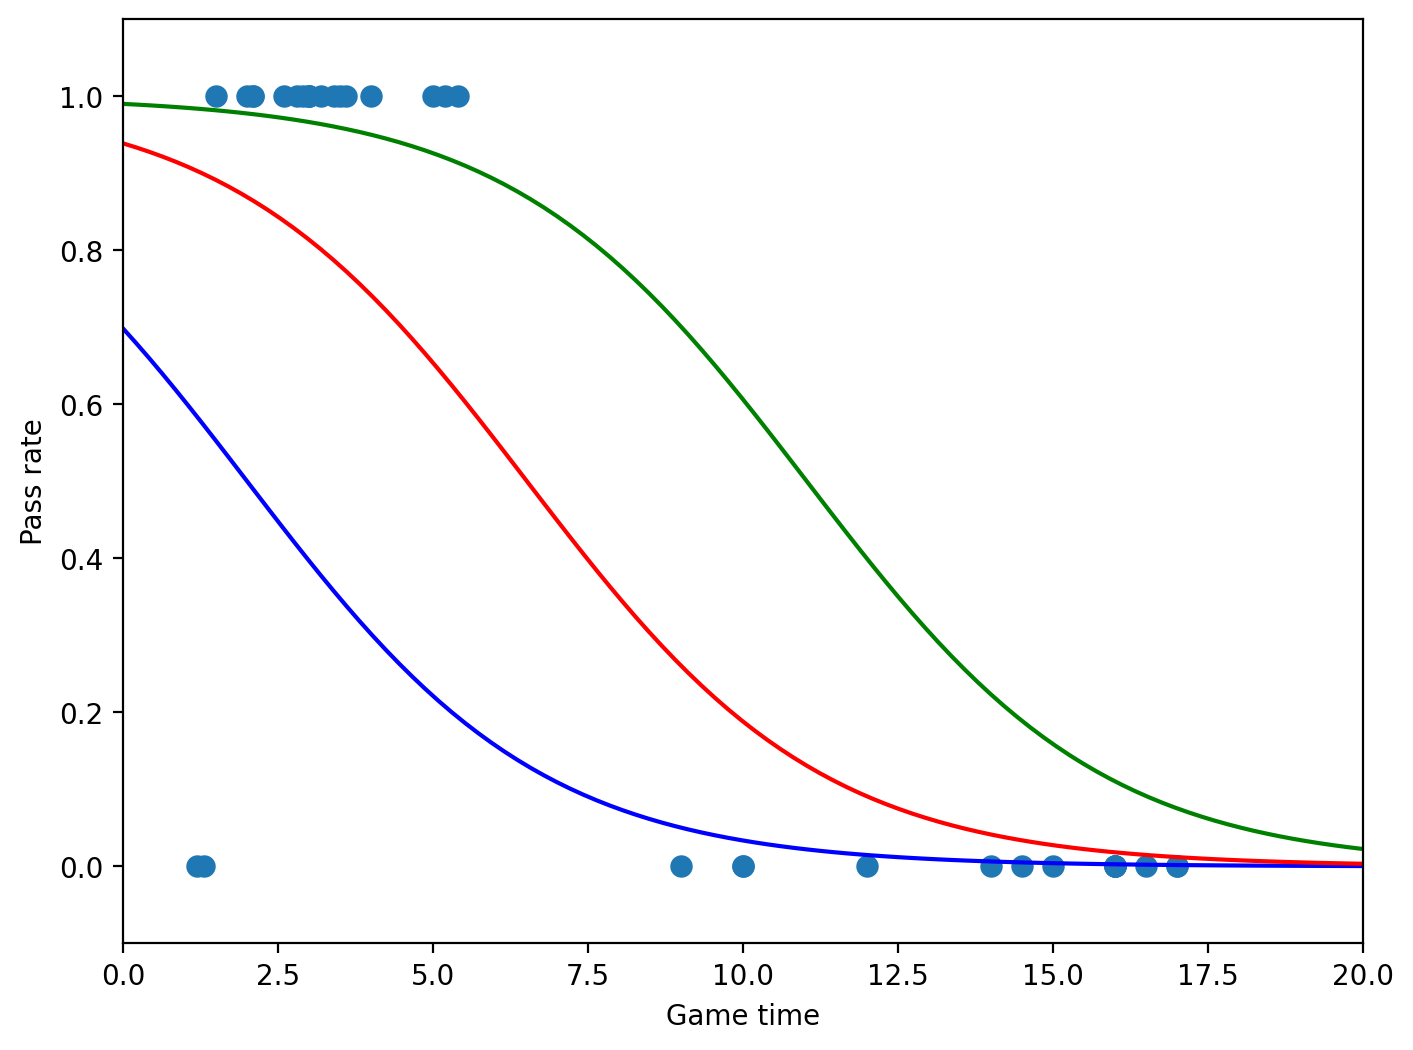

In [97]:
a1, a2, b = model.coef_[0][0], model.coef_[0][1], model.intercept_[0]
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Game time')
plt.ylabel('Pass rate')
plt.scatter(X[1], y, s=50)
XX = np.linspace(0,21, 100)

# 회귀식의 절편값이 변할 때 그래프의 움직임을 살펴본다.
# 게임한 시간에 따른 합격률이므로 기울기는 음수

yy = logreg(a1*5 +a2*XX+ b)     # 공부한 시간을 5시간으로 고정하고 게임한 시간에 따른 합격 여부
plt.plot(XX, yy, c='b')
yy = logreg(a1*7 +a2*XX+ b)     # 공부한 시간을 7시간으로 고정하고 게임한 시간에 따른 합격 여부
plt.plot(XX, yy, c='r')
yy = logreg(a1*9 +a2*XX+ b)     # 공부한 시간을 9시간으로 고정하고 게임한 시간에 따른 합격 여부
plt.plot(XX, yy, c='g')
plt.show()

## 시그모이드 함수의 특성

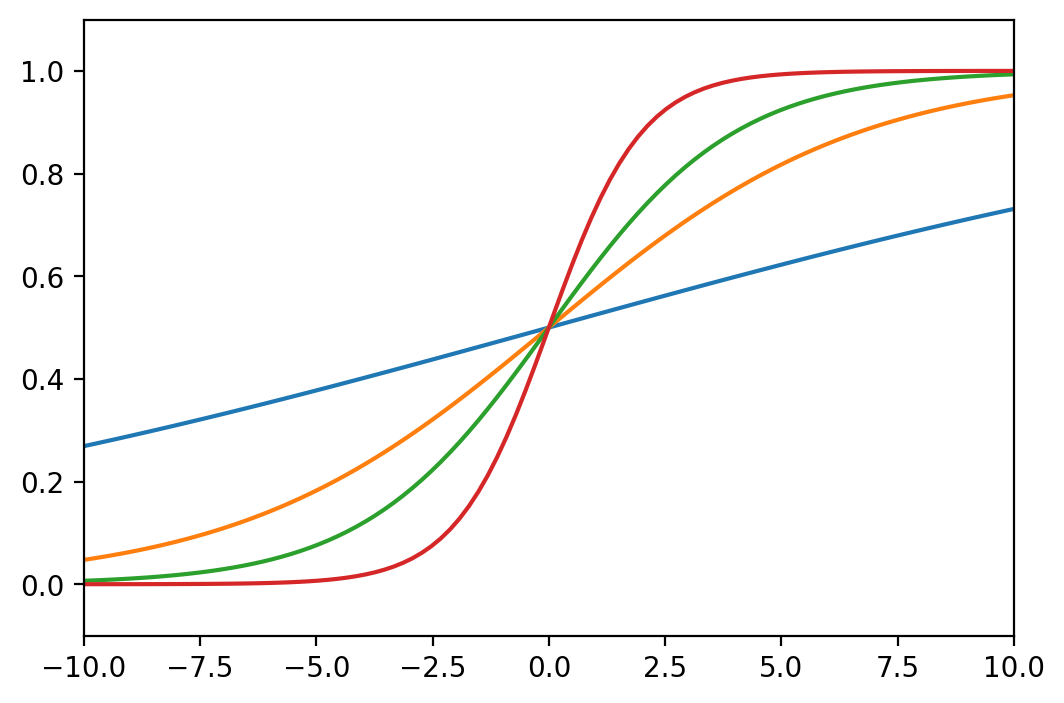

In [98]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.1,0.3, 0.5, 1]
b = 0
xs = np.linspace(-10, 10, 100)

# 회귀식의 절편은 고정하고 기울기가 변할 때 Sigmoid 함수의 형태 변화
for a in a_list:
  ys = logreg(a*xs + b)
  plt.plot(xs, ys)

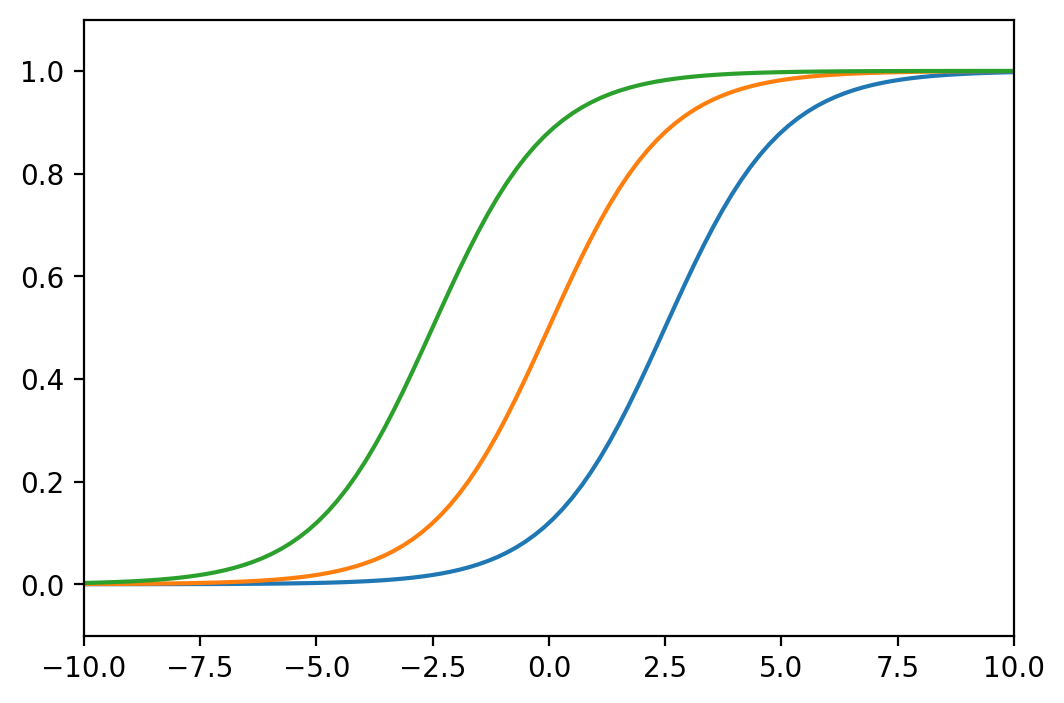

In [99]:
def logreg(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a = 0.8
b_list = [-2, 0, 2]
xs = np.linspace(-10, 10, 100)

# 회귀식의 기울기는 고정하고 절편이 변할 때 Sigmoid 함수의 형태 변화
for b in b_list: 
    ys = logreg(a*xs + b)
    plt.plot(xs, ys)

In [100]:
# 소프트맥스 구현(계산식)
score = [11,2,3,4,5] # 선형세계의 가중합
prob = []
sum = 0
for i in range(len(score)):
    prob.append(np.exp(score[i]))
    sum = sum + np.exp(score[i])

prob = prob/sum
print(prob.round(3))

[0.996 0.    0.    0.001 0.002]


# 붓꽃 분류 데이터
- 꽃받침(sepal)
- 꽃잎(petal) 
<img src="https://www.embedded-robotics.com/wp-content/uploads/2022/01/Iris-Dataset-Classification-1024x367.png" align='left'  width=1200>


### 분류
- 0 : Iris-Setosa
- 1 : Iris-Versicolour
- 2 : Iris-Virginica 


In [101]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [102]:
print(iris.data[:5])
print(iris.DESCR)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    

# 이진 분류

## 특성이 1개인 경우

In [103]:
X = iris["data"][:, 3:]                 # 꽃잎 너비 데이터만 X에 담는다.
y = (iris["target"] == 2).astype(int)   # Iris virginica이면 1 아니면 0

**노트**: 향후 버전이 바뀌더라도 동일한 결과를 만들기 위해 사이킷런 0.22 버전의 기본값인 `solver="lbfgs"`로 지정합니다.

> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">LogisticRegression 매뉴얼</a>



In [104]:
#꽃잎너비 데이터만 가지고 Iris virginica인지 아닌지 맞추는 로지스틱회귀

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

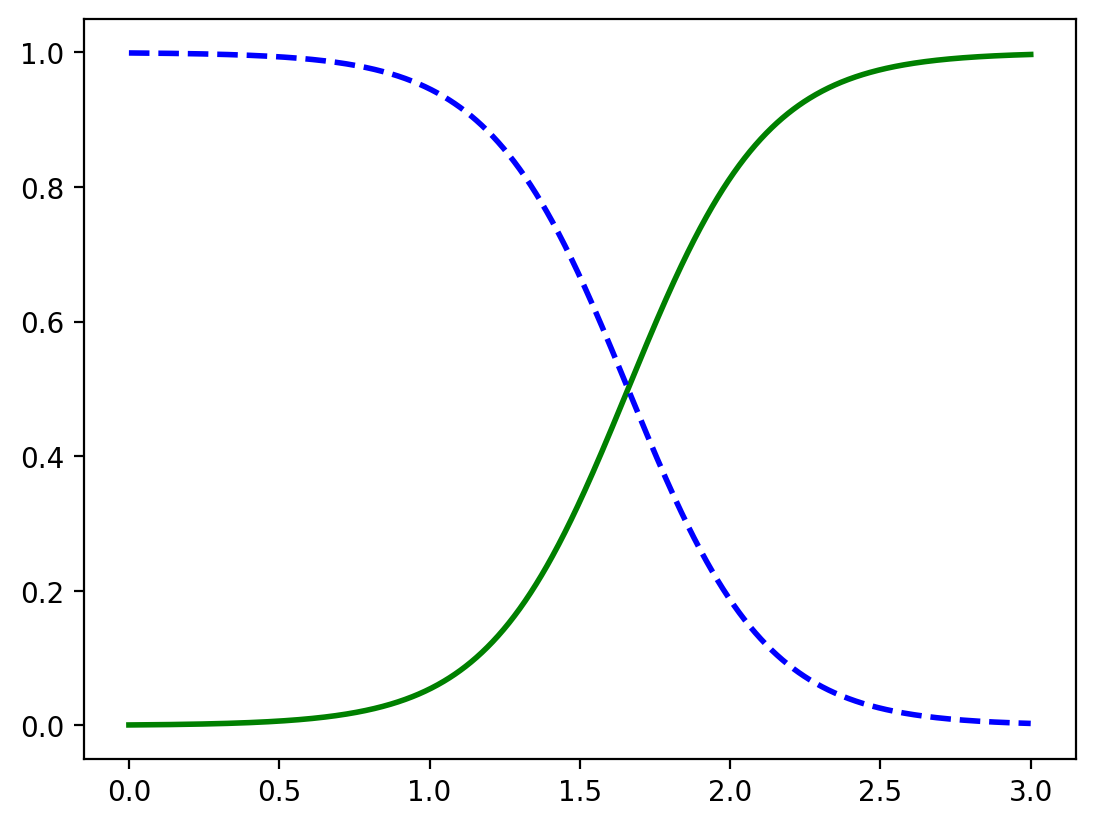

In [105]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

# 0부터 3까지 1000개의 꽃잎너비 값을 줄테니 Iris virginica일 확률을 플로팅해라 (초록 실선).
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
# 0부터 3까지 1000개의 꽃잎너비 값을 줄테니 Iris virginica가 아닐 확률을 플로팅해라 (파랑 점선).
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

- 위 그림에서 두 시그모이드 곡선의 교차지점이 결정경계가 된다.
- 그 경계지점보다 y값이 더 크면 맞다고 보고, 작으면 아니라고 본다.

In [106]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## 특성이 2개인 경우

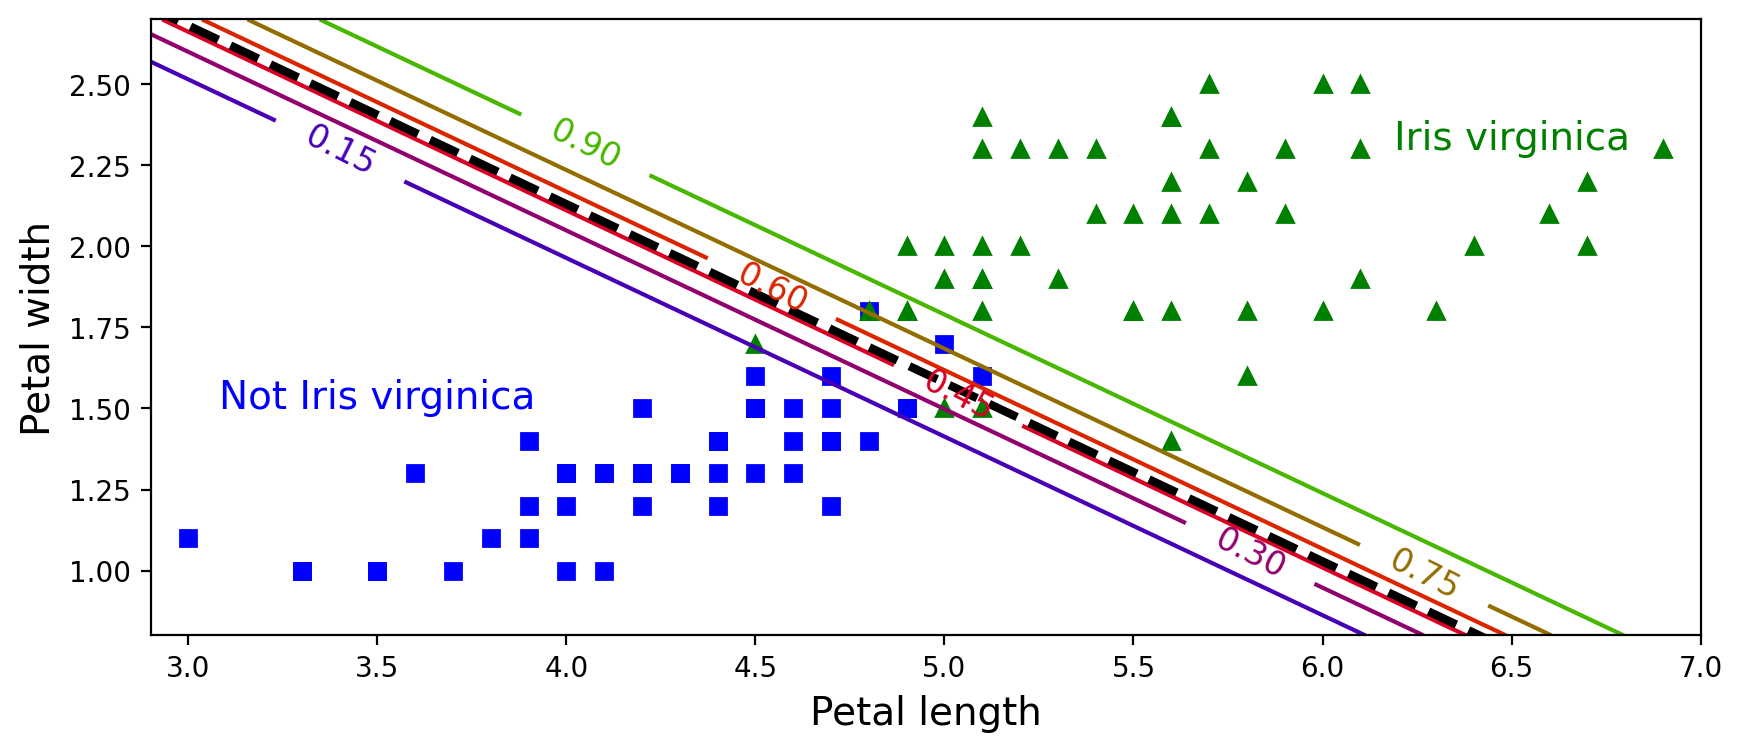

In [148]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

from sklearn.linear_model import LogisticRegression

# 꽃잎길이와 꽃잎너비만 가지고,
# Iris verginica인지 아닌지만 식별하는 LogisticRegression
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

# 데이터 포인트 표현하기 (파란네모, 초록세모) ================================
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")
# ============================================================================



# 같은 확률값을 갖는 선 그리기 ================================================
# 꽃잎길이는 2.9부터 7까지 500개의 구간으로 쪼갠 값 배열 만들고,
# 꽃잎너비는 0.8부터 2.7까지 200개의 구간으로 쪼갠 값 배열 만들어서
# 100000(500*200)개의 데이터조합을 만들어라.

# reshape(-1, 1) : 그리드를 세로 1줄로 만들어라. 즉, [n][1]의 2차원 배열을 만들기 위한 명령 
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )

X_new = np.c_[x0.ravel(), x1.ravel()]

# 100000(500*200)개의 데이터조합 각각에 대해 Iris verginica일 확률을 구해 y_proba에 담아라.
y_proba = log_reg.predict_proba(X_new)

# Iris verginica가 아닐 확률을 담는다.
zz = y_proba[:, 1].reshape(x0.shape)
# 원래 등고선 그리는 API
contour = plt.contour(x0, x1, zz, levels=8, cmap=plt.cm.brg)
# =============================================================================



# LogisticRegression으로 구해진 회귀계수로 직선 그리기  ========================
left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
# =============================================================================



plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

# 다중 분류

## 소프트맥스 (LogisticRegression)

- 분류 모델이 계산으로 얻은 선형적인 값을 확률로 매핑하는데 소프트맥스가 주로 사용된다.
- 3개 이상의 분류에서 주로 사용되며 다항 로지스틱스라고도 한다


<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%208.25.18.png?raw=1" align='left'  width=800>

**식 4-20: 소프트맥스 함수**

$
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$

**식 4-22: 크로스 엔트로피 비용 함수**

$
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$

**식 4-23: 클래스 k에 대한 크로스 엔트로피의 그레이디언트 벡터**

$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$

In [159]:
X = iris["data"][:, (2, 3)]     # 꽃잎 길이, 꽃잎 너비 데이터를 가지고
y = iris["target"]              # 4가지 Iris 유형 분류

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

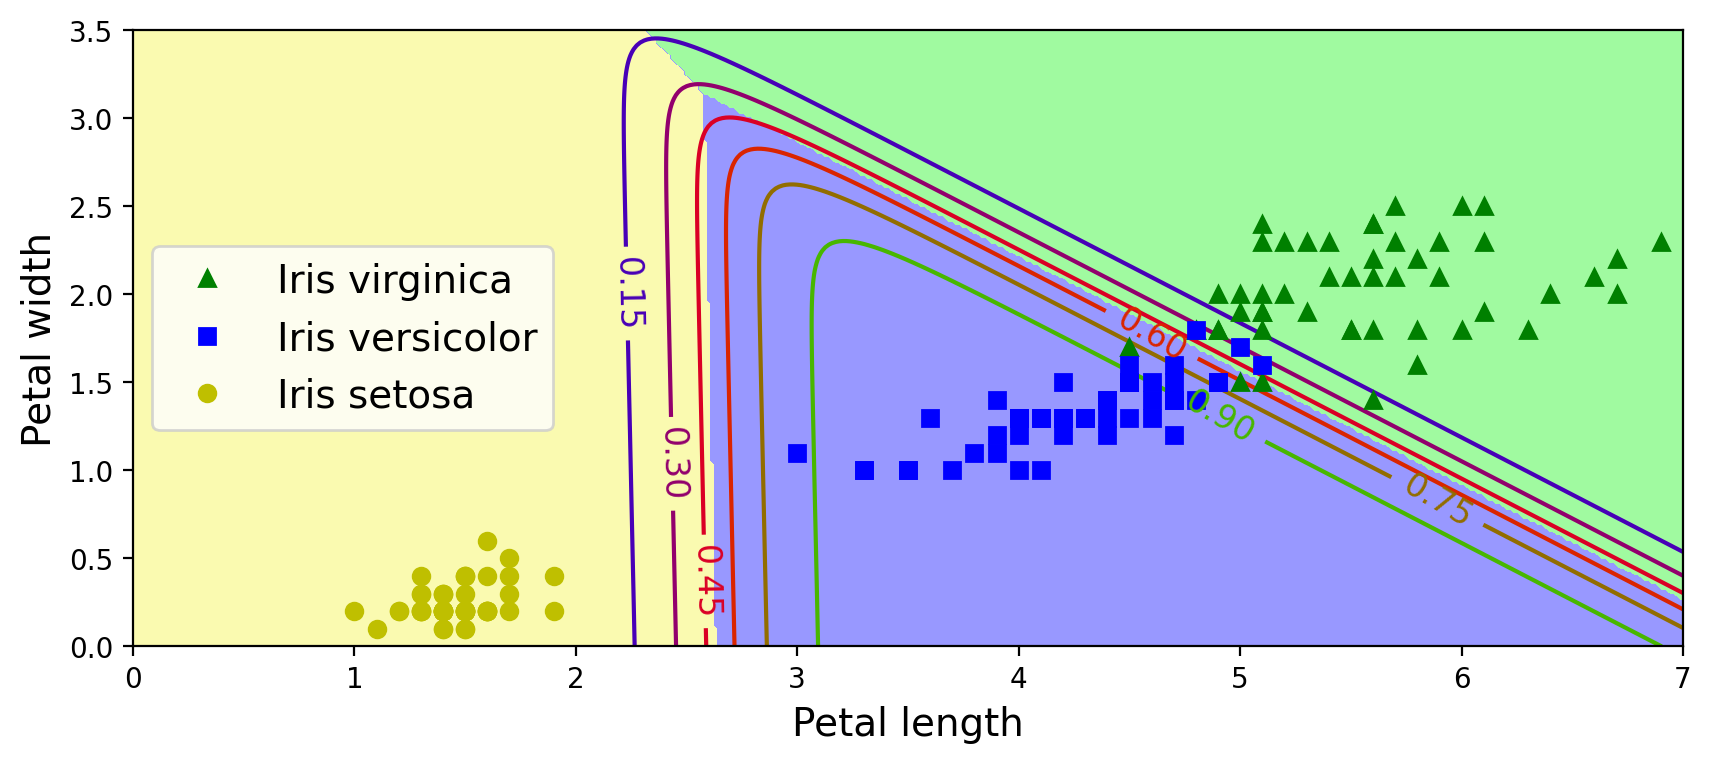

In [160]:
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.figure(figsize=(10, 4))

# 같은 확률값을 갖는 선 그리기 ================================================
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

# y_proba에는 각각 class가 0, 1, 2일 확률이 담긴다.
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

# class_1일 확률만 뽑아서 zz에 담는다.
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

# class_1일 확률이 같은 데이터 포인트들만 연결해서 등고선을 그린다.
plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
# =============================================================================


# 데이터 포인트를 플로팅 ======================================================
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")
# =============================================================================


plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

In [176]:
softmax_reg.predict([[5, 2]])

array([2])

In [177]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## 소프트맥스 (Keras.Sequential)
(다중 분류 로지스틱 회귀 모델)
M개의 입력을 받아 N개의 클래스로 출력하는 로지스틱 회귀 모델을 케라스로 구현해보도록 하겠습니다.  
보통 다중 분류 로지스틱 회귀 모델을 소프트맥스(softmax)라고 부릅니다.  
케라스에서 제공하는 MNIST 데이터를 사용하여 숫자를 0에서부터 9까지 분류해보도록 하겠습니다.  

In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

MNIST 손글씨 데이터를 다운로드 받아서 변수에 저장합니다.

In [162]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


손글씨 데이터(X_train, X_test)가 가로 28픽셀, 세로 28픽셀로 구성된 것을 확인할 수 있습니다.  
학습에 사용될 X_train은 총 60000개의 데이터, 테스트에 사용될 X_test는 총 10000개의 데이터가 있습니다.

In [163]:
print("train data (count, row, column) : " + str(X_train.shape) )
print("test data  (count, row, column) : " + str(X_test.shape) )

train data (count, row, column) : (60000, 28, 28)
test data  (count, row, column) : (10000, 28, 28)


학습 데이터의 하나를 샘플로 보도록 하겠습니다. 아래 보시는 것처럼, 각각의 픽셀은 0부터 255까지의 값을 가지고 있습니다.

In [164]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

모델 학습 시작에 앞서, 데이터를 정규화합니다.  
정규화는 입력값을 0부터 1의 값으로 변경하게 됩니다.  
정규화된 입력값은 경사하강법으로 모델 학습 시, 보다 쉽고 빠르게 최적의 W,B를 찾는 데 도움을 줍니다.

In [165]:
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255 
X_test /= 255

아래의 명령어를 통해 정규화된 데이터를 확인할 수 있습니다.

In [166]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

y_train, y_test는 손글씨 데이터 (28*28 픽셀 데이터)에 해당하는 숫자를 나타냅니다.  
y_train은 총 6만개, y_test는 총 1만개의 숫자를 가지고 있습니다.

In [167]:
print("train target (count) : " + str(y_train.shape) )
print("test target  (count) : " + str(y_test.shape) )

train target (count) : (60000,)
test target  (count) : (10000,)


아래의 코드를 실행하여, y_train과 y_test에서 샘플로 숫자를 출력해봅니다.

In [168]:
print("sample from train : " + str(y_train[0]) )
print("sample from test : " + str(y_test[0]) )

sample from train : 5
sample from test : 7


이번 실습에서는 28*28 픽셀의 지역적인 정보를 사용하지 않고, 단순히 정규화된 입력값만을 가지고,  
숫자 분류를 할 것이기 때문에, 행과 열의 구분 없이, 단순히 784 길이의 배열로 데이터를 단순화시킵니다.

In [169]:
input_dim = 784 #28*28 
X_train = X_train.reshape(60000, input_dim) 
X_test = X_test.reshape(10000, input_dim) 

아래의 명령어를 실행하여, 현재 우리의 데이터가 2차원 데이터가 아닌 단순한 1차원 데이터로 변경된 것을 확인할 수 있습니다.

In [170]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


학습 시, y값과의 cross entropy를 측정해야하므로, 아래의 코드를 실행하여 y를 one hot encoding으로 변환시켜줍니다.

In [171]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

아래 코드를 실행하여, 5였던 값이, one hot encoding으로 변환되어,  
클래스 갯수만큼의 길이를 갖는 벡터로 변경이 되었고, 5에 해당되는 인덱스의 값만 1인 것을 확인할 수 있습니다.

In [172]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


케라스의 Sequential()을 사용하여 간단하게 소프트맥스를 구현할 수 있습니다.  
총 784개(28*28)의 입력을 받아서, 10개의 시그모이드 값을 출력하는 모델을 아래의 코드를 실행하여 구현합니다.

In [173]:
model = Sequential() 
model.add(Dense(input_dim=input_dim, units = 10, activation='softmax'))

모델의 학습을 진행합니다.  
10개의 클래스로 분류할 것이기 때문에, categorical_crossentropy를 비용함수로 사용한 경사하강법으로 최적의 W와 biases를 학습합니다.

In [174]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
model.fit(X_train, y_train, batch_size=2048, epochs=100, verbose=0) 

테스트를 진행하여, 정확도를 측정합니다.

In [175]:
score = model.evaluate(X_test, y_test) 
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 1ms/step - loss: 0.4234 - accuracy: 0.8904
Test accuracy: 0.8903999924659729


아래의 코드를 실행하여, 소프트맥스 모델의 구조를 쉽게 시각화 할 수 있습니다.  
총 10개의 로지스틱회귀가 있고, 각 로지스틱회귀는 784개의 weight와 1개의 bias를 갖고 있기 때문에,  
총 7850 (785*10)개의 Param이 있는 것을 보실 수 있습니다.

In [ ]:
model.summary()

첫번째 레이어에 존재하는 w1, w2,...,w784, b1, b2,..., b10은 아래의 명령어로 확인하실 수 있습니다.

In [ ]:
model.layers[0].weights